<a href="https://colab.research.google.com/github/someshnaik777/Python-for-Data-Analytics/blob/master/Hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOTEL BOOKING EXPLORATORY DATA ANALYSIS


In [61]:
#Importing Necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd   # data manipulation
import seaborn as sns 
import matplotlib.pyplot as plt  # data vizualization
from matplotlib import rcParams
import seaborn as sns
plt.style.use("ggplot")   #apply some cool styling
rcParams['figure.figsize'] = (12, 6)

Importing a working dataset 

In [20]:
from pandas import DataFrame
df = pd.read_csv(r"hotel_bookings.csv")


Understanding the data

In [21]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0.0,1.0,Check-Out,03-07-2015


In [22]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
80958,City Hotel,1,18,2015,December,49,4,1,2,2,...,No Deposit,9.0,NaN,0,Contract,93.08,0.0,1.0,Canceled,30-11-2015
80959,City Hotel,0,4,2015,November,48,27,1,2,2,...,No Deposit,28.0,NaN,0,Transient,55.00,0.0,0.0,Check-Out,30-11-2015
80960,City Hotel,0,4,2015,November,48,27,1,2,2,...,No Deposit,9.0,NaN,0,Contract,87.00,0.0,1.0,Check-Out,30-11-2015
80961,City Hotel,0,2,2015,November,48,27,1,2,2,...,No Deposit,7.0,NaN,0,Transient,59.75,0.0,1.0,Check-Out,30-11-2015
80962,City Hotel,0,1,2015,November,48,28,1,1,2,...,No Deposit,14.0,NaN,0,Tra,NaN,NaN,NaN,NaN,NaN


In [24]:
df.shape # It returns the number of columns and length of the dataset(dimensionality of the dataset)

(80963, 32)

In [25]:
df.describe() # It returns the descriptive information about the dataset

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,80963.000000,80963.000000,80963.000000,80963.000000,80963.000000,80963.000000,80963.000000,80963.000000,80959.000000,80963.000000,80963.000000,80963.000000,80963.000000,80963.000000,69061.000000,4523.000000,80963.000000,80962.000000,80962.000000,80962.000000
mean,0.532157,113.207700,2016.046009,28.097230,15.730902,0.984203,2.675074,1.858293,0.102027,0.008461,0.033484,0.111767,0.151625,0.204155,114.090702,198.427592,2.861529,98.251350,0.071960,0.470109
std,0.498968,112.490725,0.753127,13.588102,8.777015,1.051024,2.073205,0.597823,0.398824,0.103017,0.179899,1.013481,1.679101,0.635900,119.224397,135.354259,20.305248,54.245266,0.262407,0.747704
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,21.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,62.000000,0.000000,0.000000
50%,1.000000,77.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,204.000000,0.000000,89.100000,0.000000,0.000000
75%,1.000000,175.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,281.000000,0.000000,121.737500,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,20.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [26]:
df.info() # It returns the count of non null values and integer types and memomory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80963 entries, 0 to 80962
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           80963 non-null  object 
 1   is_canceled                     80963 non-null  int64  
 2   lead_time                       80963 non-null  int64  
 3   arrival_date_year               80963 non-null  int64  
 4   arrival_date_month              80963 non-null  object 
 5   arrival_date_week_number        80963 non-null  int64  
 6   arrival_date_day_of_month       80963 non-null  int64  
 7   stays_in_weekend_nights         80963 non-null  int64  
 8   stays_in_week_nights            80963 non-null  int64  
 9   adults                          80963 non-null  int64  
 10  children                        80959 non-null  float64
 11  babies                          80963 non-null  int64  
 12  meal                            

Data Cleaning

In [30]:
# Checking the missing values in the column
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             487
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11902
company                           76440


In [33]:
# Column wise null percentage
print(round(100*(df.isnull().sum()/len(df.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.60
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             14.70
company                           94.41


Drop unnecessary columns

In [34]:
df=df.drop([ 'agent', 'company'],axis=1) #dropping the column with highest missing value

Country has 488 rows with the NaN values,488 rows out of 119390 is negligible hence we will just remove the unnecessary column

In [35]:
df = df.dropna(axis = 0)

In [36]:
df.isnull().sum() #checking the cleaned data

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Lets Rename the columns for better readability

In [54]:
df.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBookUncanceled', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays', 
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']


In [53]:
print(df)

              Hotel  Canceled  LeadTime  ArrivingYear ArrivingMonth  \
0      Resort Hotel         0       342          2015          July   
1      Resort Hotel         0       737          2015          July   
2      Resort Hotel         0         7          2015          July   
3      Resort Hotel         0        13          2015          July   
4      Resort Hotel         0        14          2015          July   
...             ...       ...       ...           ...           ...   
80957    City Hotel         1        96          2015      December   
80958    City Hotel         1        18          2015      December   
80959    City Hotel         0         4          2015      November   
80960    City Hotel         0         4          2015      November   
80961    City Hotel         0         2          2015      November   

       ArrivingWeek  ArrivingDate  WeekendStay  WeekStay  Adults  ...  \
0                27             1            0         0       2  ...   
1

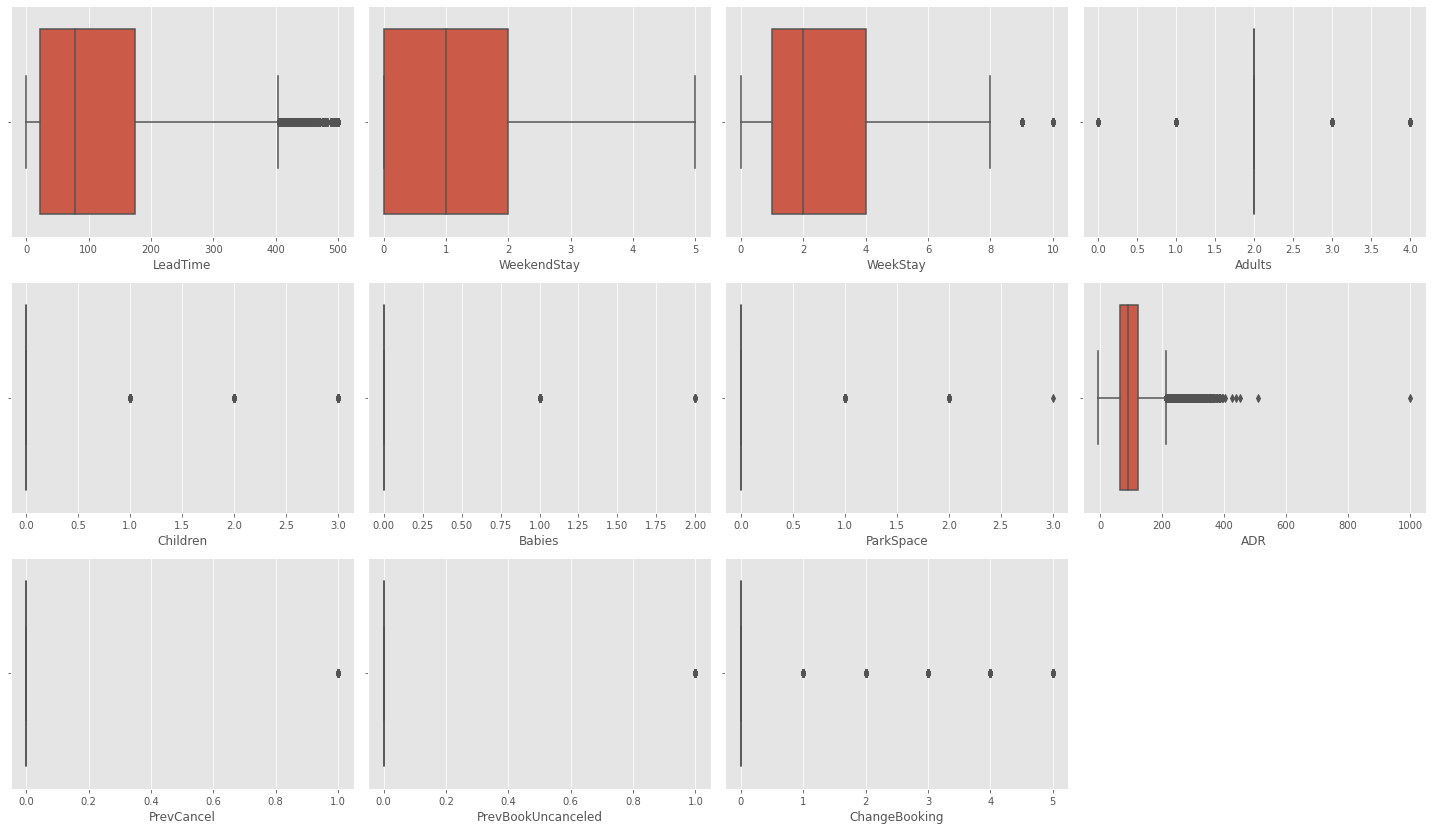

In [62]:
# Creating a boxplot for Outlier detection
columns = ['LeadTime', 'WeekendStay', 'WeekStay', 'Adults', 'Children', 'Babies', 'ParkSpace', 'ADR', 'PrevCancel', 'PrevBookUncanceled', 'ChangeBooking']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

In [59]:
df.loc[df.LeadTime > 500, 'LeadTime'] = 500
df.loc[df.WeekendStay >=  5, 'WeekendStay'] = 5
df.loc[df.Adults > 4, 'Adults'] = 4
df.loc[df.PrevBookUncanceled > 0, 'PrevBookUncanceled'] = 1
df.loc[df.PrevCancel > 0, 'PrevCancel'] = 1
df.loc[df.WeekStay > 10, 'WeekStay'] = 10
df.loc[df.ChangeBooking > 5, 'ChangeBooking'] = 5
df.loc[df.Babies > 8, 'Babies'] = 0
df.loc[df.ParkSpace > 5, 'ParkSpace'] = 0
df.loc[df.Children > 8, 'Children'] = 0
df.loc[df.ADR > 1000, 'ADR'] = 1000